<a href="https://colab.research.google.com/github/raghavanpartha/FirstApp/blob/main/CNN_Lung_infection_prediction_raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Ensure GPU is selected
# Runtime > Change Runtime > From Dropdown select GPU 

In [ ]:
# Create a Classification model that can predict whether the given image is a dog or cat

In [1]:
#For Colab users, once the zip file is uploaded, extract the same
! unzip data_Lungs.zip

Archive:  data_Lungs.zip
   creating: data_Lungs/
  inflating: __MACOSX/._data_Lungs   
  inflating: data_Lungs/.DS_Store    
  inflating: __MACOSX/data_Lungs/._.DS_Store  
   creating: data_Lungs/test/
  inflating: __MACOSX/data_Lungs/._test  
   creating: data_Lungs/train/
  inflating: __MACOSX/data_Lungs/._train  
   creating: data_Lungs/test/Type 1 disease/
  inflating: __MACOSX/data_Lungs/test/._Type 1 disease  
  inflating: data_Lungs/test/.DS_Store  
  inflating: __MACOSX/data_Lungs/test/._.DS_Store  
   creating: data_Lungs/test/healthy/
  inflating: __MACOSX/data_Lungs/test/._healthy  
   creating: data_Lungs/test/Type 2 disease/
  inflating: __MACOSX/data_Lungs/test/._Type 2 disease  
   creating: data_Lungs/train/Type 1 disease/
  inflating: __MACOSX/data_Lungs/train/._Type 1 disease  
  inflating: data_Lungs/train/.DS_Store  
  inflating: __MACOSX/data_Lungs/train/._.DS_Store  
   creating: data_Lungs/train/Healthy/
  inflating: __MACOSX/data_Lungs/train/._Healthy  
   crea

In [2]:
import tensorflow as tf

In [3]:
#Preprocessing --- Goal to make the data compatible for CNN input
# In tensorflow, you can achieve the same using ImageGenerators


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [4]:
#Pass the images through the generator

trainImageData = train_generator.flow_from_directory("data_Lungs/train/",
                                                     batch_size=32, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 


testImageData = train_generator.flow_from_directory("data_Lungs/test/",
                                                     batch_size=32, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [5]:
#Given dataset is a balanced dataset !!!

trainImageData.class_indices

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

In [6]:
trainImageData.filenames

['Healthy/01.jpeg',
 'Healthy/010.jpeg',
 'Healthy/011.jpeg',
 'Healthy/012.jpeg',
 'Healthy/013.jpeg',
 'Healthy/014.jpeg',
 'Healthy/015.jpeg',
 'Healthy/016.jpeg',
 'Healthy/017.jpeg',
 'Healthy/018.jpeg',
 'Healthy/019.jpeg',
 'Healthy/02.jpeg',
 'Healthy/020.jpeg',
 'Healthy/021.jpeg',
 'Healthy/022.jpeg',
 'Healthy/023.jpeg',
 'Healthy/024.jpeg',
 'Healthy/025.jpeg',
 'Healthy/03.jpeg',
 'Healthy/04.jpeg',
 'Healthy/05.jpeg',
 'Healthy/050.jpeg',
 'Healthy/051.jpeg',
 'Healthy/052.jpeg',
 'Healthy/053.jpeg',
 'Healthy/054.jpeg',
 'Healthy/055.jpeg',
 'Healthy/056.jpeg',
 'Healthy/057.jpeg',
 'Healthy/058.jpeg',
 'Healthy/059.jpeg',
 'Healthy/06.jpeg',
 'Healthy/060.jpeg',
 'Healthy/061.jpeg',
 'Healthy/062.jpeg',
 'Healthy/063.jpeg',
 'Healthy/064.jpeg',
 'Healthy/065.jpeg',
 'Healthy/066.jpeg',
 'Healthy/067.jpeg',
 'Healthy/068.jpeg',
 'Healthy/069.jpeg',
 'Healthy/07.jpeg',
 'Healthy/070.jpeg',
 'Healthy/071.jpeg',
 'Healthy/072.jpeg',
 'Healthy/073.jpeg',
 'Healthy/074.jpeg',

In [7]:
trainImageData.image_shape

(48, 48, 3)

In [8]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


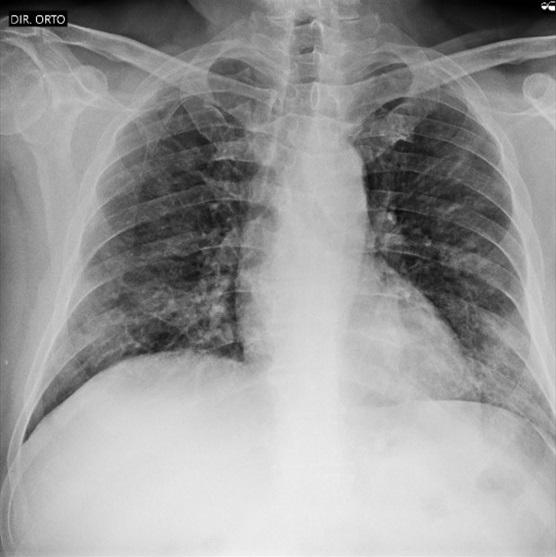

In [13]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
img = cv2.imread('COVID-00012.jpg')
cv2_imshow(img)

#import matplotlib.image as mpimg 
#from matplotlib.pyplot import imshow
#%matplotlib inline
#testim = mpimg.imread('COVID-00012.jpg')
#imshow(testim)

#while True:
#    k = cv2_imshow.waitKey(0) & 0xFF     
#    if k == 27: break             # ESC key to exit
#cv2_imshow.destroyAllWindows()

In [15]:
# ARchitect the model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 3 , activation="softmax"))
#model.add(tf.keras.layers.Dense(units= 2 , activation="softmax"))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_4 (Dense)             (None, 4096)             

In [17]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=['accuracy'])

In [18]:
len(trainImageData.filenames) // trainImageData.batch_size

7

In [19]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 10:
      self.model.stop_training=True

In [ ]:
# Fit the model
# batch_size=32
# model.fit(trainImageData,
#          validation_data=testImageData,
#          epochs=10,
#          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size, #For training
#          validation_steps= len(testImageData.filenames) // testImageData.batch_size) #For testing

In [20]:
# Fit the model
# batch_size=32
history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=10,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/10
7/7 [==============================] - 15s 2s/step - loss: 3.6685 - accuracy: 0.3973 - val_loss: 1.3280 - val_accuracy: 0.3750
Epoch 2/10
7/7 [==============================] - 14s 2s/step - loss: 0.9318 - accuracy: 0.5708 - val_loss: 1.5391 - val_accuracy: 0.2969
Epoch 3/10
7/7 [==============================] - 13s 2s/step - loss: 0.6294 - accuracy: 0.8128 - val_loss: 1.7850 - val_accuracy: 0.3125
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 0.3360 - accuracy: 0.8904 - val_loss: 3.2694 - val_accuracy: 0.3281
Epoch 5/10
7/7 [==============================] - 13s 2s/step - loss: 0.3605 - accuracy: 0.8356 - val_loss: 3.6971 - val_accuracy: 0.2969
Epoch 6/10
7/7 [==============================] - 13s 2s/step - loss: 0.9654 - accuracy: 0.8447 - val_loss: 2.4432 - val_accuracy: 0.3125
Epoch 7/10
7/7 [==============================] - 13s 2s/step - loss: 0.3907 - accuracy: 0.8219 - val_loss: 3.2794 - val_accuracy: 0.1875
Epoch 8/10
7/7 [==================

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#Prediction
# model
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[0. 1. 0.]]


In [23]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.,
                                                                  rotation_range=90,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)


In [24]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 10:
      self.model.stop_training=True

In [25]:
# Fit the model after augmentation

history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=10,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/10
7/7 [==============================] - 14s 2s/step - loss: 0.2169 - accuracy: 0.9361 - val_loss: 7.2620 - val_accuracy: 0.0469
Epoch 2/10
7/7 [==============================] - 14s 2s/step - loss: 0.1901 - accuracy: 0.9269 - val_loss: 6.5998 - val_accuracy: 0.0469
Epoch 3/10
7/7 [==============================] - 13s 2s/step - loss: 0.0617 - accuracy: 0.9909 - val_loss: 7.5588 - val_accuracy: 0.1719
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 0.2755 - accuracy: 0.9087 - val_loss: 6.5785 - val_accuracy: 0.0625
Epoch 5/10
7/7 [==============================] - 13s 2s/step - loss: 0.0218 - accuracy: 0.9954 - val_loss: 7.2297 - val_accuracy: 0.2344
Epoch 6/10
7/7 [==============================] - 13s 2s/step - loss: 0.2302 - accuracy: 0.9286 - val_loss: 8.4377 - val_accuracy: 0.0312
Epoch 7/10
7/7 [==============================] - 13s 2s/step - loss: 0.0198 - accuracy: 0.9909 - val_loss: 9.6138 - val_accuracy: 0.0312
Epoch 8/10
7/7 [==================

In [27]:
#Prediction
# model
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[0. 1. 0.]]


Epoch 1/10
7/7 [==============================] - 13s 2s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 15.3430 - val_accuracy: 0.2812
Epoch 2/10
7/7 [==============================] - 12s 2s/step - loss: 2.1405 - accuracy: 0.8265 - val_loss: 7.2746 - val_accuracy: 0.0625
Epoch 3/10
7/7 [==============================] - 14s 2s/step - loss: 0.0120 - accuracy: 0.9955 - val_loss: 8.9576 - val_accuracy: 0.0312
Epoch 4/10
7/7 [==============================] - 13s 2s/step - loss: 0.0216 - accuracy: 0.9909 - val_loss: 8.4451 - val_accuracy: 0.0469
Epoch 5/10
7/7 [==============================] - 13s 2s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.8068 - val_accuracy: 0.0469
Epoch 6/10
7/7 [==============================] - 13s 2s/step - loss: 6.8947e-04 - accuracy: 1.0000 - val_loss: 11.2787 - val_accuracy: 0.0469
Epoch 7/10
7/7 [==============================] - 13s 2s/step - loss: 2.5898e-04 - accuracy: 1.0000 - val_loss: 11.7950 - val_accuracy: 0.0469
Epoch 8/10
7/7 [=======

In [28]:
#Saving Model
model.save("LungsDiseaseDetector")

INFO:tensorflow:Assets written to: LungsDiseaseDetector/assets


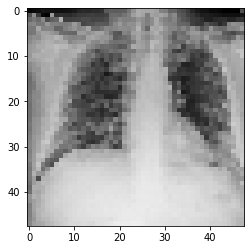

In [29]:
#Deployment Example
#Step1: Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [30]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)

myImageNPArray.shape

(48, 48, 3)

In [31]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [32]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)

In [33]:
prediction

array([[0., 1., 0.]], dtype=float32)

In [34]:
list(trainImageData.class_indices)[np.argmax(prediction)]

'Type 1 disease'